# Lesson 4

## Supervised Learning- Classification Models


---

## Overview

Welcome to this Lesson. We are now going to use our new skills to build our supervised learning models that use a classification approach.

---


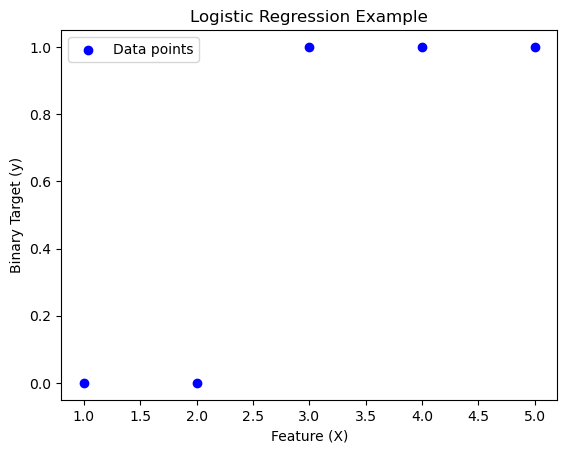

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset with binary outcomes
X = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])  # Binary target variable

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Feature (X)')
plt.ylabel('Binary Target (y)')
plt.title('Logistic Regression Example')
plt.legend()
plt.show()

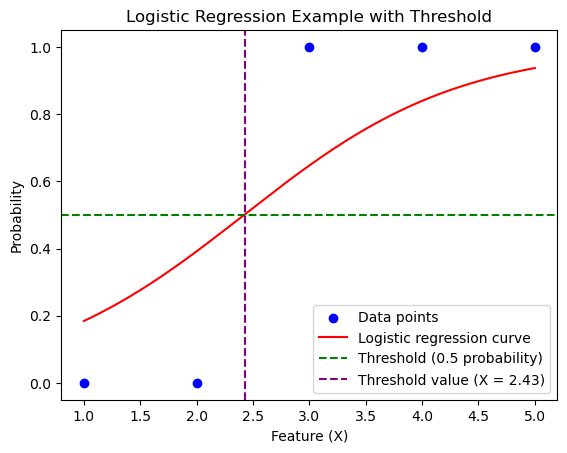

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reshape X to fit the model
X_reshaped = X.reshape(-1, 1)

# Create and fit the logistic regression model
model = LogisticRegression().fit(X_reshaped, y)

# Generate a range of values for X to plot the logistic regression curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]  # Probability of class 1

# Determine the threshold feature value where the probability is 0.5
threshold_index = np.where(y_prob >= 0.5)[0][0]
threshold_value = X_range[threshold_index]

# Plot the data points and the logistic regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, y_prob, color='red', label='Logistic regression curve')

# Add the threshold lines
plt.axhline(0.5, color='green', linestyle='--', label='Threshold (0.5 probability)')
plt.axvline(threshold_value, color='purple', linestyle='--', label=f'Threshold value (X = {threshold_value[0]:.2f})')

plt.xlabel('Feature (X)')
plt.ylabel('Probability')
plt.title('Logistic Regression Example with Threshold')
plt.legend()
plt.show()

### Creating our historical returns dataset

In [6]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [7]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [8]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [9]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [10]:
# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  501 of 501 completed

4 Failed downloads:
['AON', 'MS']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
['TFC']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))
['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1714536000")


Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.5322 NaN 0.8450  NaN  NaN 8.3272 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2068 NaN 0.7737  NaN  NaN 8.0893 1.2708 NaN 14.9094 26.8927   
2000-01-05   37.7128 NaN 0.7851  NaN  NaN 8.0745 1.3889 NaN 15.2042 27.2852   
2000-01-06   36.2768 NaN 0.7171  NaN  NaN 8.3570 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.2999 NaN 0.7511  NaN  NaN 8.4462 1.4514 NaN 16.0730 27.2852   

Price       ... Volume                                                    \
Ticker      ...    WTW       WY WYNN      XEL       XOM XYL      YUM ZBH   
Date        ...                                                            
2000-01-03  ...    NaN   973700  NaN  2738600  13458200 NaN  3033493 NaN   
2000-01-04  ...    NaN  1201700  NaN   425200  14510800 NaN  3315031 NaN   
2000-01-05  ...    NaN  1184600  NaN   500200  17485000 NaN  4642602 NaN   
2000-01-06  ...    NaN  1307700  NaN   344100  19461600 NaN  3947658 NaN   
2000-01-07  ...    NaN  1728000  NaN   469500  16603800 NaN  6063647 NaN   

Price                    
Ticker         ZBRA ZTS  
Date                     
2000-01-03  1055700 NaN  
2000-01-04   522450 NaN  
2000-01-05   612225 NaN  
2000-01-06   263925 NaN  
2000-01-07   333900 NaN  

[5 rows x 3006 columns]

In [11]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.5322 NaN 0.8450  NaN  NaN 8.3272 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2068 NaN 0.7737  NaN  NaN 8.0893 1.2708 NaN 14.9094 26.8927   
2000-01-05   37.7128 NaN 0.7851  NaN  NaN 8.0745 1.3889 NaN 15.2042 27.2852   
2000-01-06   36.2768 NaN 0.7171  NaN  NaN 8.3570 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.2999 NaN 0.7511  NaN  NaN 8.4462 1.4514 NaN 16.0730 27.2852   

Price       ...                                                             
Ticker      ... WTW      WY WYNN    XEL     XOM XYL    YUM ZBH    ZBRA ZTS  
Date        ...                                                             
2000-01-03  ... NaN 11.4279  NaN 6.9076 18.1810 NaN 4.6574 NaN 25.0278 NaN  
2000-01-04  ... NaN 10.9986  NaN 7.0667 17.8328 NaN 4.5638 NaN 24.6667 NaN  
2000-01-05  ... NaN 11.5812  NaN 7.3394 18.8050 NaN 4.5872 NaN 25.1389 NaN  
2000-01-06  ... NaN 12.1230  NaN 7.2712 19.7771 NaN 4.5482 NaN 23.7778 NaN  
2000-01-07  ... NaN 11.7243  NaN 7.2712 19.7191 NaN 4.4468 NaN 23.5139 NaN  

[5 rows x 501 columns]

In [12]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.5322,NaN,0.8450,NaN,NaN,8.3272,1.2778,NaN,16.2747,28.3256,...,NaN,11.4279,NaN,6.9076,18.1810,NaN,4.6574,NaN,25.0278,NaN
2000-01-04,40.2068,NaN,0.7737,NaN,NaN,8.0893,1.2708,NaN,14.9094,26.8927,...,NaN,10.9986,NaN,7.0667,17.8328,NaN,4.5638,NaN,24.6667,NaN
2000-01-05,37.7128,NaN,0.7851,NaN,NaN,8.0745,1.3889,NaN,15.2042,27.2852,...,NaN,11.5812,NaN,7.3394,18.8050,NaN,4.5872,NaN,25.1389,NaN
2000-01-06,36.2768,NaN,0.7171,NaN,NaN,8.3570,1.3750,NaN,15.3283,26.5393,...,NaN,12.1230,NaN,7.2712,19.7771,NaN,4.5482,NaN,23.7778,NaN
2000-01-07,39.2999,NaN,0.7511,NaN,NaN,8.4462,1.4514,NaN,16.0730,27.2852,...,NaN,11.7243,NaN,7.2712,19.7191,NaN,4.4468,NaN,23.5139,NaN


In [13]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100
# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 501, dtype: int64

In [14]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=495)

In [15]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [16]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

## Beginning Lesson 4

### Data Preparation

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 5, 15, 20]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01         0.0775       0.0727       0.0489        0.0299   
       2000-02-02         0.0163       0.0775       0.1199        0.1250   
       2000-02-03        -0.0193       0.0163       0.1361        0.1670   
       2000-02-04         0.0426      -0.0193       0.1203        0.1275   
       2000-02-07        -0.0063       0.0426       0.2011        0.1627   

                   20_d_returns  
Ticker Date                      
A      2000-02-01       -0.0139  
       2000-02-02        0.1504  
       2000-02-03        0.2465  
       2000-02-04        0.2708  
       2000-02-07        0.2231

In [19]:
# Converting the 'F_1_d_returns' to binary based on whether the value is positive or not
total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01         0.0775       0.0727       0.0489        0.0299   
       2000-02-02         0.0163       0.0775       0.1199        0.1250   
       2000-02-03        -0.0193       0.0163       0.1361        0.1670   
       2000-02-04         0.0426      -0.0193       0.1203        0.1275   
       2000-02-07        -0.0063       0.0426       0.2011        0.1627   

                   20_d_returns  F_1_d_returns_Ind  
Ticker Date                                         
A      2000-02-01       -0.0139                  1  
       2000-02-02        0.1504                  1  
       2000-02-03        0.2465                  0  
       2000-02-04        0.2708                  1  
       2000-02-07        0.2231                  0

## Definining Train Test Data

In [20]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
split_date

Timestamp('2017-01-20 00:00:00')

In [21]:
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

In [22]:
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns']


total_returns  = test_data[target]

features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns_Ind']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

##  Benchmark

In [24]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())

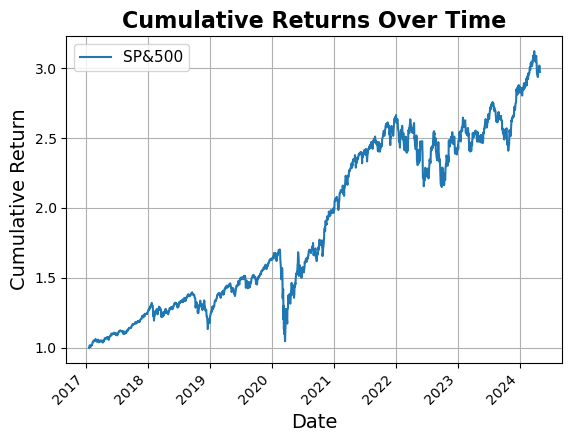

In [25]:
# Plotting the cumulative returns
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [26]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

In [27]:
ending_value    = cum_returns['SP&500'].iloc[-1]
beginning_value = cum_returns['SP&500'].iloc[1]

In [28]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

The CAGR is: 16.07%


In [29]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [30]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.85


In [31]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())

In [32]:
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date]   (SP&500)

## LogisticRegression 

In [150]:
# Add a constant to the model (intercept)
X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Fit the model
# Creating and fitting the logistic regression model
model = sm.Logit(y_train, sm.add_constant(X_train_scaled_const_add)).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.692310
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      F_1_d_returns_Ind   No. Observations:               250338
Model:                          Logit   Df Residuals:                   250333
Method:                           MLE   Df Model:                            4
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:               0.0008610
Time:                        20:18:26   Log-Likelihood:            -1.7331e+05
converged:                       True   LL-Null:                   -1.7346e+05
Covariance Type:            nonrobust   LLR p-value:                 2.060e-63
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0439      0.004     10.979      0.000       0.036       0.052
1_d_returns     -0.0307

In [164]:
# Add a constant to the model (intercept)
X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Fit the model
# Creating and fitting the logistic regression model
model = sm.Logit(y_train, sm.add_constant(X_train_scaled_const_add)).fit()

y_pred = model.predict(X_test_scaled_const_add)
y_pred

Optimization terminated successfully.
         Current function value: 0.692310
         Iterations 4


Ticker  Date                     
ABT     2017-01-20 00:00:00-05:00   0.5082
        2017-01-23 00:00:00-05:00   0.5115
        2017-01-24 00:00:00-05:00   0.5111
        2017-01-25 00:00:00-05:00   0.5120
        2017-01-26 00:00:00-05:00   0.5018
                                     ...  
ZTS     2024-04-23 00:00:00-04:00   0.5128
        2024-04-24 00:00:00-04:00   0.5150
        2024-04-25 00:00:00-04:00   0.5113
        2024-04-26 00:00:00-04:00   0.4897
        2024-04-29 00:00:00-04:00   0.4950
Length: 129029, dtype: float64

In [151]:
# Make predictions
y_pred = model.predict(X_test_scaled_const_add)

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)

y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)
#y_test_and_pred = pd.merge(y_test_and_pred, total_returns, left_index=True, right_index=True)


In [155]:
total_returns

F_1_d_returns
Ticker Date                                    
ABT    2017-01-20 00:00:00-05:00        -0.0030
       2017-01-23 00:00:00-05:00        -0.0007
       2017-01-24 00:00:00-05:00         0.0000
       2017-01-25 00:00:00-05:00         0.0161
       2017-01-26 00:00:00-05:00         0.0010
...                                         ...
ZTS    2024-04-23 00:00:00-04:00         0.0088
       2024-04-24 00:00:00-04:00         0.0164
       2024-04-25 00:00:00-04:00         0.0330
       2024-04-26 00:00:00-04:00         0.0081
       2024-04-29 00:00:00-04:00        -0.0029

[129029 rows x 1 columns]

In [152]:
y_test_and_pred.head()

y_pred  F_1_d_returns
Ticker Date                                            
ABT    2017-01-20 00:00:00-05:00  0.5082        -0.0030
       2017-01-23 00:00:00-05:00  0.5115        -0.0007
       2017-01-24 00:00:00-05:00  0.5111         0.0000
       2017-01-25 00:00:00-05:00  0.5120         0.0161
       2017-01-26 00:00:00-05:00  0.5018         0.0010

## Evaluation

In [134]:
model_name = 'Log'

In [139]:
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0.5:
        return  1 # Go long
    else:
        return  0  
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 


In [142]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 15.69%
Sharpe Ratio of Strategy: 0.93


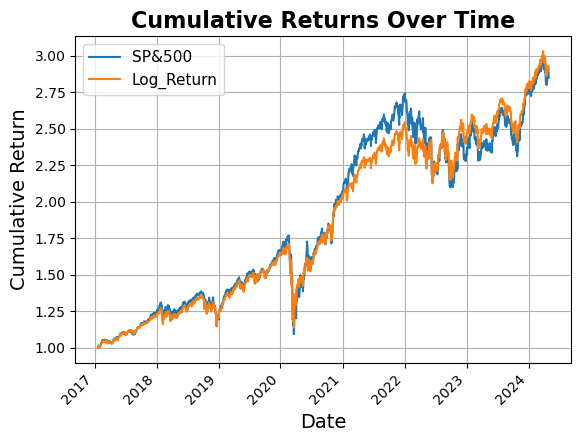

In [141]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [124]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)

### Decision Tree


In [181]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [176]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train Decision Tree classifier
#model = DecisionTreeClassifier()
#model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
# Convert predictions to a pandas Series with the same index as X_test_scaled
y_pred_df = pd.DataFrame(y_pred, index=X_test_scaled.index)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)

In [177]:
y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)
#y_test_and_pred = pd.merge(y_test_and_pred, total_returns, left_index=True, right_index=True)

In [178]:
model_name = 'Decision Tree'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 

In [179]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return']  = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 12.7%
Sharpe Ratio of Strategy: 0.96


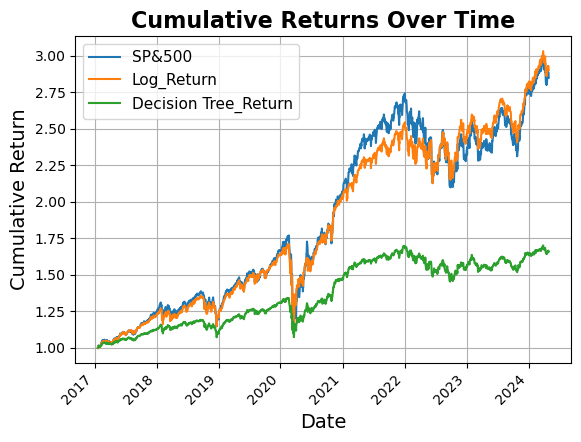

In [172]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [173]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)

### XGBoost

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier with fixed parameters
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5189981645043378
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.29      0.36    424391
           1       0.53      0.73      0.61    468011

    accuracy                           0.52    892402
   macro avg       0.51      0.51      0.49    892402
weighted avg       0.51      0.52      0.49    892402



In [34]:
best_xgb_model

NameError: name 'best_xgb_model' is not defined

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier with fixed parameters
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


NameError: name 'X_train_scaled' is not defined

In [ ]:
model_name = 'XGBoost'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 


In [ ]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

In [ ]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')
# Display the plot
plt.show()

In [ ]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

### Elastic Net

In [835]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.001, l1_ratio=0.5) 
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.001)

In [836]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)
y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)

In [837]:
model_name = 'ElasticNet'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 

In [838]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

In [839]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 15.99%
Sharpe Ratio of Strategy: 0.88


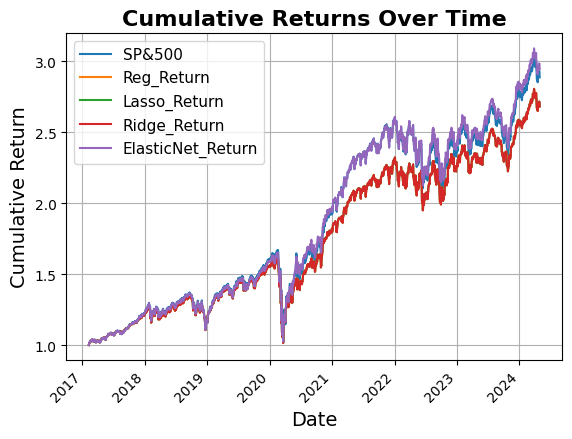

In [840]:
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [841]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)